In [1]:
import numpy as np

# step-1: 

at low M field use $E = g_f \mu_B B  m_F$, to get $g_f$, then compare with theoratical value of $g_f = \pm $ 1/3 for 85 and $\pm 1/2$ for 87 

$g_f = $Eh/\mu_B B = $. also affirmed by the theoratical prediction of frequency ratio $E(85)/E(87) = g_f(85)/g_f(87)=2/3$, and absorption ratio is related to population of 85 and 87 (the sample contain more 85)


$g_F = \frac{E}{\mu_B B m_F}= \frac{E}{\mu_B  B}$

In [2]:
# B = 0.06*1e-3 # T
B = 0.09*1e-3 # T

muB_in_frequency = 14 # GHz / T


In [3]:
frequency = 380 #kHz
frequency / muB_in_frequency / B *1e-6

0.30158730158730157

In [4]:
frequency = 590 #kHz
frequency / muB_in_frequency / B *1e-6

0.4682539682539683

# low field, derive g factors

total angular momemtum $F = I \pm J$, where $J=1/2$ is the electron spin

for $^{87}Rb$ $I = 3/2$, hyperfine levels are $F = 1,2$

for  $^{85}Rb$ $I = 5/2$, hyperfine levels are $F = 2,3$


In [5]:
muB_in_frequency = 14 # GHz / T

def gJ(J, S, L):
    return 1+(J*(J+1)+S*(S+1)-L*(L+1))/(2*J*(J+1))

def gF(gJ, F, J, I):
    return gJ*(F*(F+1) + J*(J+1)-I*(I+1))/(2*F*(F+1))

def weekfield_frequency(B,#in mili Tesla
              mF,
              gF):
    return  gF * muB_in_frequency * B *1e-3 * mF # in GHz

def weekfield_transition_frequency(B,#in mili Tesla
              delta_mF,
              gF):
    return  weekfield_frequency(B, delta_mF,gF)

In [7]:
def strongfield_transition_frequency(F,mF1,mF2,B , I = 3/2):
    assert abs(mF1 - mF2) == 1 or abs(mF1 - mF2) == 0
    hyperfine_spacing = 6.8 #GHz    
    x = 2 /hyperfine_spacing * muB_in_frequency*B  # unitless
    return   hyperfine_spacing /2 * ( np.sqrt(1+4*mF1/(2*I + I)*x + x**2)  - np.sqrt(1+4*mF2/(2*I + I)*x + x**2)   ) # GHz

$g_J == 2$ always becasue S = J, dletaw = 6.8GHz * h, x \approx 1e-3$ 

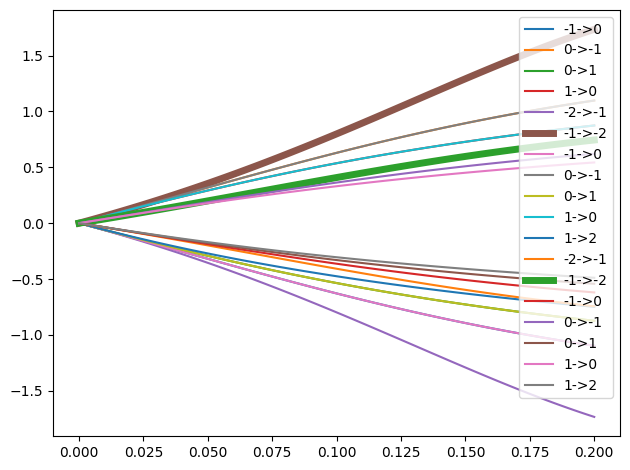

In [19]:
import matplotlib.pyplot as plt
B_list = np.linspace(0,0.2,100)
for I, name,F_list in zip([3/2,5/2],
                      ['87','85'],
                      [[1,2],[2]]):
    for F in F_list:
        mF_list = {2:[(-2,-1),(-1,-2),(-1,0),(0,-1),(0,1),(1,0),(1,2)],
                   1:[(-1,0),(0,-1),(0,1),(1,0)]}[F]
        for (mF1,mF2) in mF_list:
            freq = []
            for B in B_list:
                freq.append(strongfield_transition_frequency(F = F,mF1=mF1,mF2=mF2,B =B, I = I))
            if mF1 == -1 and mF2 == -2:
                plt.plot(B_list,freq,label =f'{mF1}->{mF2}',lw=5)
            else:
                plt.plot(B_list,freq,label =f'{mF1}->{mF2}')
plt.legend()
plt.tight_layout()